In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('homeprices.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


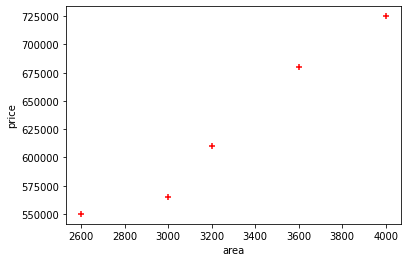

In [3]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')    

In [51]:
new_df = df.drop('price',axis='columns')
new_df

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [49]:
price = df.price
price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [19]:

reg = linear_model.LinearRegression()
reg.fit(new_df,price)

LinearRegression()

In [20]:
reg.predict([[3300]])

array([628715.75342466])

In [21]:
reg.coef_

array([135.78767123])

In [22]:
reg.intercept_

180616.43835616432

In [24]:
 135.78767123*3300+180616.43835616432
 reg.coef_*3300+reg.intercept_

array([628715.75342466])

In [38]:
area_df = pd.read_csv("areas.csv")
area_df.head(3)

,area
0,1000
1,1500
2,2300


In [39]:
price_ = reg.predict(area_df)
reg.predict(area_df)


array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [31]:
reg.predict([[1000]])

array([316404.10958904])

In [41]:
area_df["price"] = price_
area_df

,area,price
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [43]:
area_df.to_csv("prediction.csv",index=False)

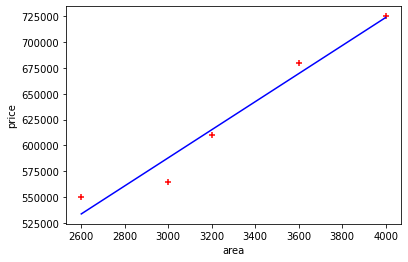

In [45]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')  
plt.plot(new_df,reg.predict(new_df),color="blue")